In [28]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

In [29]:
def to_seconds(timestr):
    seconds = 0
    for part in timestr.split(':'):
        seconds= seconds*60 + float(part)
    return seconds

def speedup(s, p):
    return s/p

In [30]:
df = pd.read_csv('../../../Code/stream_graph_data/times.csv')
df = df.dropna()
df['serial'] = df['serial'].apply(lambda x: to_seconds(x))
df['mpi2'] = df['mpi2'].apply(lambda x: to_seconds(x))
df['mpi4'] = df['mpi4'].apply(lambda x: to_seconds(x))
df['speedup2'] = df.apply(lambda x: speedup(x.serial, x.mpi2), axis=1)
df['speedup4'] = df.apply(lambda x: speedup(x.serial, x.mpi4), axis=1)
df = df.sort_values(by=['edges'])
df

,network,nodes,edges,serial,mpi2,mpi4,speedup2,speedup4
39,zachary_karate_club,34,76,0.423315,0.071631,0.084743,5.909662,4.995280
40,zebra,27,109,0.181358,0.038807,0.137882,4.673332,1.315313
31,dolphins,62,157,2.333861,0.559994,0.709212,4.167654,3.290780
37,train_bombing,64,241,5.495319,0.604871,0.936076,9.085109,5.870591
35,PDZBase,210,242,46.998709,16.398845,20.889638,2.865977,2.249858
29,david_coperfield,112,423,4.144149,0.414875,0.581217,9.988910,7.130124
36,protein,1870,2275,991.630126,504.814992,623.551947,1.964344,1.590293
34,infectious,410,2764,16.093001,1.912145,1.393206,8.416203,11.551056
32,facebook_NIPS,2886,2979,24.317111,3.239840,2.221953,7.505652,10.944026
38,virgili,1133,5449,535.525550,29.491814,42.052870,18.158447,12.734578


In [31]:
values = [*range(df.edges.min(), df.edges.max())] 
edges = df.edges.tolist()
nodes = df.nodes.tolist()
serial = df.serial.tolist()
mpi2 = df.mpi2.tolist()
mpi4 = df.mpi4.tolist()
speedup2 = df.speedup2.tolist()
speedup4 = df.speedup4.tolist()

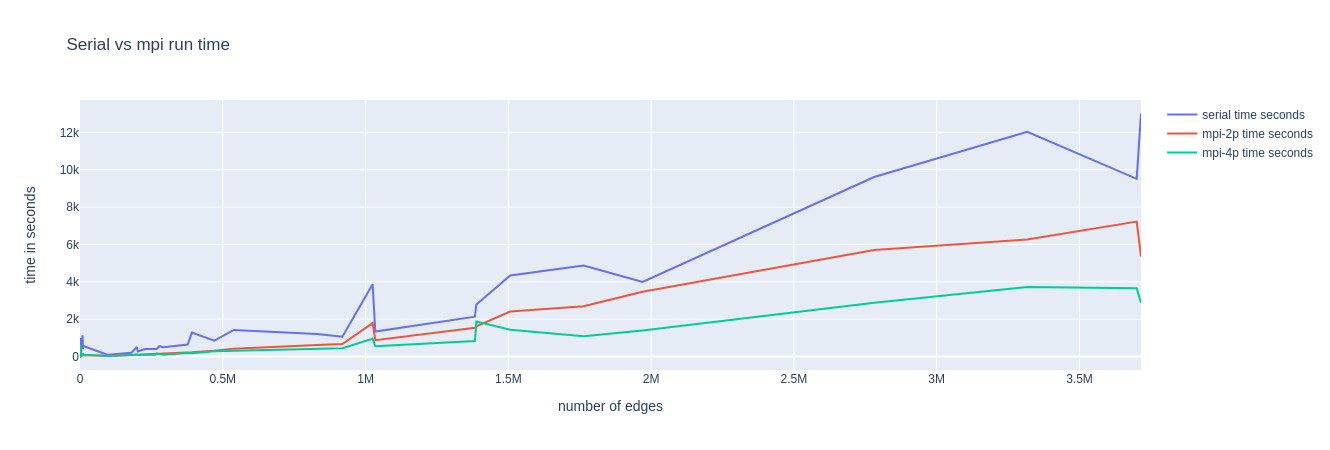

In [44]:
fig = go.Figure()

# Add traces
fig.add_trace(go.Scatter(x=edges, y=serial,
                    mode='lines',
                    name='serial time seconds'))

fig.add_trace(go.Scatter(x=edges, y=mpi2,
                    mode='lines',
                    name='mpi-2p time seconds'))

fig.add_trace(go.Scatter(x=edges, y=mpi4,
                    mode='lines',
                    name='mpi-4p time seconds'))

fig.update_layout(title='Serial vs mpi run time', 
                  xaxis_title="number of edges", 
                  yaxis_title="time in seconds",)
fig.show()

In [ ]:
fig = go.Figure()

# Add traces
fig.add_trace(go.Scatter(x=edges, y=speedup2,
                    mode='lines+markers'))

fig.update_layout(title='Speedup 2p', 
                  xaxis_title="number of edges", 
                  yaxis_title="serial/parallel",)
fig.show()

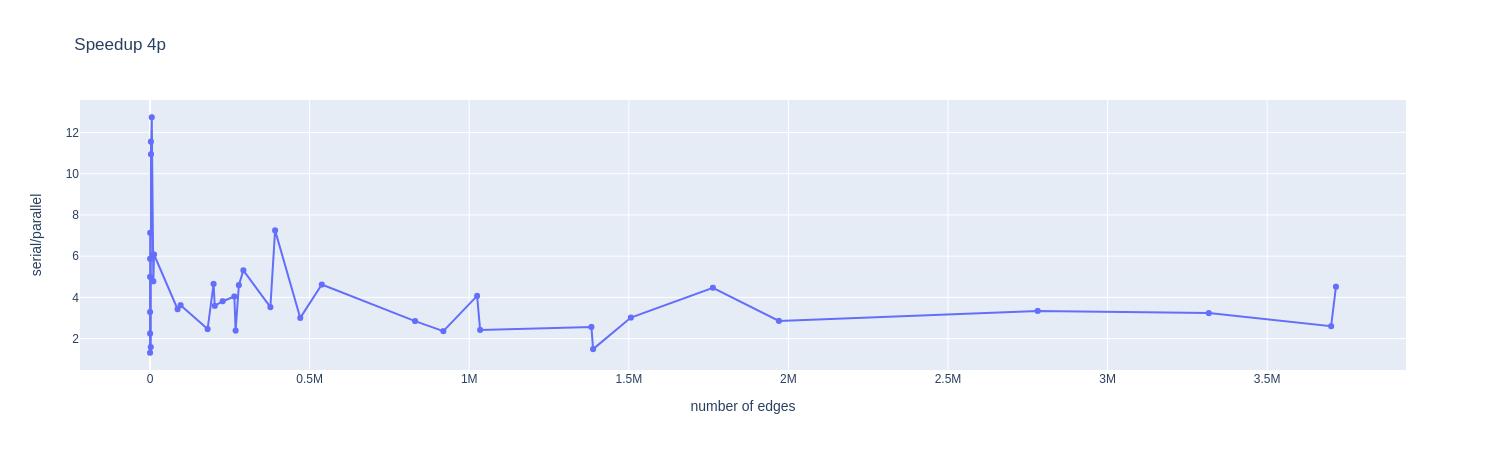

In [41]:
fig = go.Figure()

# Add traces
fig.add_trace(go.Scatter(x=edges, y=speedup4,
                    mode='lines+markers'))

fig.update_layout(title='Speedup 4p', 
                  xaxis_title="number of edges", 
                  yaxis_title="serial/parallel",)
fig.show()